# Robot Run Cafe

An initial overview of the US city of Los Angeles dining industry is the goal of a market study.
Significant changes have occurred in Los Angeles food culture during the past ten years. If the city's major sources of pride in the past were the upscale eateries in Hollywood and Santa Monica, you can discover a broad variety of restaurants and cafés throughout the city now that offer unique and refreshing culinary cultural experiences.


The collected data contains 9651 records regarding food establishments located throughout the city.
We'll examine the current state of the market and the trends that define it. The project's goal is to offer potential investors with a preliminary analysis of the market so they can determine whether it would be feasible economically to open a robotic café in the area.

1. [Opening data](#opening_data)
    * [Importing libaries](#importing_libareis)
    * [General information](#info)
    * [Samples](#samples)
    * [Seats location metrics](#describe)
    * ['Type' Proportions](#type_proportions)
2. [Preprocessing data](#preprocessing)
    * [Missing Values](#missing_values)
    * [Replacing columns names](#replacing_columns_names)
    * [Type changes](#type_changes)
    * [Processing duplicates](#duplicates)
    * [Restoring addresses](#restoring_addresses)
    * [Put the data on street names from the address column in a separate column.](#street_names)
    * [Data preprocessing sum](#data_preprocessing_sum)
3. [Data analysis](#data_analysis)
    * [Investigate the proportions of the various types of establishments. Plot a graph.](#type_proportions_graph)
    * [Investigate the proportions of chain and nonchain establishments. Plot a graph.](#chain/non-chain_proportions)
    * [Which type of establishment is typically a chain ?](#typical_chain)
    * [What characterizes chains: many establishments with a small number
    of seats or a few establishments with a lot of seats?](#characterizes_chains)
    * [Determine the average number of seats for each type of restaurant.
    On average, which type of restaurant has the greatest number of seats? Plot graphs.](#mean_seats)
    * [Plot a graph of the top ten streets by number of restaurants.](#top_ten)
    * [Find the number of streets that only have one restaurant.](#only_one)
    * [For streets with a lot of restaurants,
    look at the distribution of the number of seats. What trends can you see?](#(distribution_on_busy_streets)
    * [Final conclusions](#Final_conclusions)
3. [Presentation](#presentation)

<a id="opening_data"></a>

<a id="importing_libareis"></a>

In [76]:
# importing liaberies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import usaddress
import nltk
import re
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
from os.path import exists
from plotly import graph_objects as go
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import Image
from IPython.core.display import HTML

In [77]:
#"C:\Users\ohayo\Desktop\Data\rest_data_us (1).csv"

In [78]:
# Reading the file
try:
    robots=pd.read_csv('/datasets/rest_data_us.csv')
except:
    robots=pd.read_csv('/Users/ohayo/Desktop/Data/rest_data_us (1).csv')
    print("Working Locally")

Working Locally


<a id="info"></a>

In [79]:
#Cheking the general information and size
display(robots.info(memory_usage='deep'))

display(robots.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


None

(9651, 6)

<a id="samples"></a>

In [80]:
# Row sampling
display(robots.head(3))

display(robots.tail(3))

display(robots.sample(3))

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20


,id,object_name,address,chain,object_type,number
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


,id,object_name,address,chain,object_type,number
7500,19286,BILLINGSLEY'S,11326 W PICO BLVD,True,Restaurant,168
6326,18112,LAS CHAMPAS,7915 S CENTRAL AVE,True,Restaurant,29
6138,17924,ERIKA'S PALACE,763 S KERN AVE,False,Restaurant,33


<a id="describe"></a>

In [81]:
# checking 'seats' location metrics
robots.describe(include = object)

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


<a id="type_proportions"></a>

In [82]:
# proportions of object_type (percentage)
robots.object_type.value_counts()/len(robots) * 100

Restaurant    75.173557
Fast Food     11.045488
Cafe           4.507305
Pizza          3.315719
Bar            3.025593
Bakery         2.932339
Name: object_type, dtype: float64

<a id="preprocessing"></a> 

<a id="missing_values"></a> 

In [83]:
# 3 missing enteries in 'is_chain' column
## i'm creating null list so it would be easy to adress is later (if nedded).
nulls = robots.query('chain != True & chain != False')
nulls_list = nulls['object_name'].unique().tolist()

robots.loc[robots['object_name'].isin(nulls_list)]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [84]:
# Droppin missing values - we can't replace them due to the fact that there is no pattern
## that determines which venue belongs to the chain and which doesn't.
robots = robots.dropna(how='any')

In [85]:
robots.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

<a id="replacing_columns_names"></a> 

In [86]:
# Replacing columns names
robots.columns = ['id', 'venue', 'address', 'is_chain', 'type', 'seats']
robots.tail(8)

,id,venue,address,is_chain,type,seats
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25
9644,21430,LA BUFADORA BAR,3470 E 1ST ST,False,Bar,24
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


<a id="type_changes"></a> 

In [87]:
# changing  'is_chain' to boolean type
# # changing 'type' into 'category'
robots['is_chain']=robots['is_chain'].astype('bool')
robots['type']=robots['type'].astype('category')
robots.head(3)

,id,venue,address,is_chain,type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20


<a id="duplicates"></a> 

In [88]:
# no duplicates
robots.duplicated().sum()

0

<a id="restoring_addresses"></a>

In [89]:
# Here i'm creating a function that would restore addresses (the addresses appear to be messy):
def cleaning_check(raw):
    """This function had made to fix addresses by using usaddress library.
    parameters:
    raw(input): raw addresses given by the raw data
    raw_address(list)= usaddress list of addresses, decomposed by parse() method.
    dict_address= empty dict that would store fixed addresses
    """
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

robots['clean_street_check']=robots.address.apply(cleaning_check)
print('addresses that our function didnt handle right: ')
robots[robots['clean_street_check']=='no street or number']

addresses that our function didnt handle right: 


,id,venue,address,is_chain,type,seats,clean_street_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


In [90]:
def cleaning_final(raw):
    """This function fix some off the addresses that cleaning_check didn't manage to hadle. 
    the fuction trace specific strings of street names.
    the function returns addresses that still need to be fixed.
    parameters:
    raw(input): raw addresses
    """
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

robots['clean_street_final']=robots.address.apply(cleaning_final)
display(robots.sample(3))

,id,venue,address,is_chain,type,seats,clean_street_check,clean_street_final
5203,16989,HNDLGO,928 S WESTERN AVE # 132,False,Restaurant,27,"928,WESTERN","928 WESTERN, Los Angeles,USA"
7229,19015,THE KITCHEN @ WESTWOOD,1510 WESTWOOD BLVD,True,Restaurant,18,"1510,WESTWOOD","1510 WESTWOOD, Los Angeles,USA"
9574,21360,HIGHLAND PARK BREWERY,1220 N SPRING ST,False,Restaurant,105,"1220,SPRING","1220 SPRING, Los Angeles,USA"


<a id="street_names"></a>

In [91]:
def cleaning_tag(raw):
    """This function is designed to remove a mark of tagging previously found in some addresses. 
    the fuction exclude specific that were already fixed and returns them. 
    
    parameters:
    raw(input): raw addresses with # mark
    """
    try:
        if raw.startswith('OLVERA'):
            clean_adress='OLVERA,Los Angeles,USA'
        elif raw.startswith('1033 1/2 LOS ANGELES'):
            clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
        elif raw.startswith('3425 E 1ST ST SO. 3RDFL'):
            clean_adress='3425 E 1ST ST SO. 3RDFL'
        else:
            clean_adress=usaddress.tag(raw)[0]['StreetName']
    except:
        clean_adress='no street'
    return clean_adress

robots['clean_street_tag']=robots.address.apply(cleaning_tag)
display(robots.head(3))

,id,venue,address,is_chain,type,seats,clean_street_check,clean_street_final,clean_street_tag
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK","3708 ROCK, Los Angeles,USA",EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD","100 WORLD, Los Angeles,USA",WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD","6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD


In [92]:
# here i'm just checking the size of the dataframe, making sure that missing values were erase.
len(robots)

9648

In [93]:
df=robots
def regex_str_col(df,cols):
    for col in cols:
        df[col] = df[col].str.lower()
        df[col] = df[col].replace('[^a-zA-Z0-9 ]', '', regex = True)
        return df

cols = ['venue','clean_street_check','type']
robot=regex_str_col(df,cols)

# Here i'm creating a list of supliactes 'venues' & 'addresses'
dups=df[df.duplicated(subset=['venue', 'address'])]
dups.shape[0]
# there are 19 duplicates that were created by the adreesess functions.

19

In [94]:
display(dups.head(3))

,id,venue,address,is_chain,type,seats,clean_street_check,clean_street_final,clean_street_tag
4984,16770,carls jr 212,1751 S SOTO ST,True,Restaurant,106,"1751,SOTO","1751 SOTO, Los Angeles,USA",SOTO
6012,17798,mr boba,3805 W 6TH ST,True,Restaurant,44,"3805,6TH","3805 6TH, Los Angeles,USA",6TH
6102,17888,sixth st tavern,630 W 6TH ST # 116BC,False,Restaurant,136,"630,6TH","630 6TH, Los Angeles,USA",6TH


In [95]:
# Here i'm lowering the case, sorting & dropping the duplicates
df=df.applymap(lambda s:s.lower() if type(s) == str else s)
df=df.sort_values('seats', ascending = False)
df=df.sort_values(by=['venue','clean_street_check']).drop_duplicates(subset = ['venue','clean_street_check'])

# creating 'word_only' column in order to keep venues names alone
## i'm using regex expression , split(), then attaches the edited data to a new variable under the name "dff".
df['word_only']=df['venue'].str.replace(r'\d+','')
df['word']=df['word_only'].str.split(' ').str[0]
dff=df.sort_values('seats', ascending=False)
dff=dff.sort_values(by=['word','clean_street_final']).drop_duplicates(subset = ['word','clean_street_final'], keep='last')
len(dff)

9102

In [96]:
# now i making sure i have no duplicates
dff.duplicated().sum()

0

In [97]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9102 entries, 5614 to 8465
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  9102 non-null   int64 
 1   venue               9102 non-null   object
 2   address             9102 non-null   object
 3   is_chain            9102 non-null   bool  
 4   type                9102 non-null   object
 5   seats               9102 non-null   int64 
 6   clean_street_check  9102 non-null   object
 7   clean_street_final  9102 non-null   object
 8   clean_street_tag    9102 non-null   object
 9   word_only           9102 non-null   object
 10  word                9102 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 791.1+ KB


<a id="data_preprocessing_sum"></a>

# Preprocessing sum

__1 .General info:__ The raw dataset has 6 columns and 9,651 rows.

__2 .Missing values:__ 3 missing values were found in 'is_chain' column.
These values were stored in a small data frame under the name "nulls".
Three businesses which coordinated with those missing values were stored in a list under the name "nulls list".
Finally the three entries were removed from the frame.

* Since applying dropna after changing the data type does not really delete the missing rows, the missing values were eliminated before the data was altered.

__3 .Columns names:__ The columns names have been updated to read "venue" instead of "object name", "object_type" was changed to "type", "chain" to "is_chain," and "number" to "seats".

__4 .Data types changes:__

The data type in the 'is_chain' column, which describes in a boolean manner whether the establishment is associated with the chain, was edited and changed to a 'boolean' type instead of 'object'.

The data type in the 'type' column has changed from 'object' to 'category'.

__5 .Duplicates:__ There were no initial duplicates discovered in the database.

__6 .Address column:__ The issue with the values in the addsress column was solved by three separate functions.
This column's content appeared disorganized and lacked a standard format.
The data was organized using a combination of techniques, including 'regex', the 'usaddress' library, 'If/Else' statements, parse, apply, and more.

Addresses that the initial function was unable to classify were added to a new column labeled "clean street check."
Addresses that had been sorted were put in a new column named "clean street final," and addresses from which the third function had removed tags were put in a column called "clean street tag."

__7 .Values lower case:__ lowering case for columns 'venue','clean_street_check','type'.

__8 .Duplicates:__ 19 duplicate rows were created during the process of rearranging the addresses. iv'e dropped them.

__9 .'Word' ,'clean_street_final' & sorting__: Another column named "word" was created to store names of businesses.
This column and the 'clean_street_final' column, which already contains accurate addresses, were used to sort the modified data.

__10 .Info:__ The filtered/ordered dataframe now includes 9,102 rows and 11 columns (of which 5 new ones were created in the preprocessing process).

<a id="data_analysis"></a>

<a id="type_proportions_graph"></a>

In [98]:
# res_types is a data frame that created in order to visualize the proportions of vunue types 
## and it would be later in use to culculate the chance of being in a chain.
res_types=dff.groupby('type', as_index=False).agg({'id':'count'})
res_types.columns=['type','number_of_venues']
# plotting a Pie Chart
px.pie(res_types, values='number_of_venues',
      title='Proportions of Venue Types', names='type')

<a id="chain/non-chain_proportions"></a>

In [99]:
# boolean grouping of 'chain', counting id's , changing res_chain columns names
res_chain=dff.groupby('is_chain', as_index=False).agg({'id':'count'})
res_chain.columns=['chain','number_of_values']
# plotting a Pie Chart
px.pie(res_chain, values='number_of_values',
      title='Chains Vs. Single branch venues', names='chain')

<a id="typical_chain"></a>

In [100]:
# creating chains data-frame by using query.
chains=dff.query('is_chain == True')

# creatin 'chain' frame ,grouping by chain names, counting names & summing the number of seats.
chain=chains.groupby('venue')['seats'].agg(['count', 'sum'])
chain.columns=['n_venues', 'total_seats'] # changing the columns names

chain.sort_values(by='n_venues', ascending=True).head(5) #sorting by number of venues in ascending order

,n_venues,total_seats
venue,,
1 chinese fast food,1,6
panini cafe downtown,1,91
panos bakery pastry,1,29
papa jakes sub shop prep kitchen,1,9
papa johns pizza 2623,1,6


In [101]:
# replacing '#' symbols in 'venue' values, by using regex engine and replace() method.
chains['venue']=chains.venue.replace('#', '',regex=True).replace(' [0-9]*$', '', regex=True)

chain=chains.groupby('venue')['seats'].agg(['count', 'sum']) #grouping by venue names, counting & summing numbers of seats.
chain.columns=['n_venus', 'total_seats'] # changing columns names

display(chain.sort_values(by='n_venus').head(3))

,n_venus,total_seats
venue,,
1 chinese fast food,1,6
nerisbakery fast food,1,45
neris bakery fast food,1,26


In [102]:
# chains_types would store types of venues, countung 'id's' as the number of venues.
chains_types=chains.groupby('type', as_index=False).agg({'id':'count'})
chains_types.columns=['venue_type', 'number_of_venues']

# Deviding res_types['number_of_venues'] by chains_types['number_of_venues'] would give me the proportions.
chains_types['prob_of_being_chain:%']=((chains_types['number_of_venues'] / res_types['number_of_venues']) * 100).round(2)
chains_types.sort_values(by='prob_of_being_chain:%', ascending=False)

,venue_type,number_of_venues,prob_of_being_chain:%
0,bakery,266,100.00
2,cafe,250,60.10
3,fast food,563,56.19
4,pizza,141,46.23
5,restaurant,2077,30.39
1,bar,74,26.52


In [103]:
# 17% of our data contain chains with only 1 venue
round(len(chain.query('n_venus == 1')) / len(dff), 2)

0.17

In [104]:
# Because there was no discernible relationship between the number of branches and belonging to a chain,
## I concluded that a chain is a business with more than one branch.
chains_clean=chain.query('n_venus != 1')
chains_clean.head()

,n_venus,total_seats
venue,,
abc donuts,2,22
aca grill,2,143
angeles bakery,2,34
angelini alimentari,2,40
antigua bread,2,47


<a id="characterizes_chains"></a>


In [105]:
# plotting stacked bar plot of chain/non-chain by seats
fig=px.histogram(dff, x='seats', color='is_chain')
fig.show()

<a id="mean_seats"></a>

,venue_type,mean_num_of_seats
5,restaurant,47.479222
1,bar,44.451613
3,fast food,31.864271
4,pizza,29.134426
2,cafe,25.098558
0,bakery,21.315789


count    9102.000000
mean       43.265216
std        47.205889
min         1.000000
25%        13.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: seats, dtype: float64

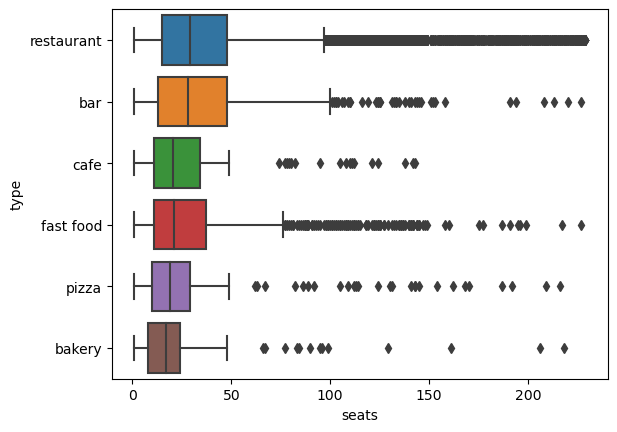

In [106]:
# plotting a boxplot for 'seats' distribution
ax = sns.boxplot(x='seats', y='type', data=dff)

res_seats=dff.groupby('type', as_index=False).agg({'seats':'mean'})
res_seats.columns=['venue_type', 'mean_num_of_seats']
res_seats.sort_values(by='mean_num_of_seats', ascending=False)

display(dff.seats.describe())

<AxesSubplot: xlabel='seats', ylabel='type'>

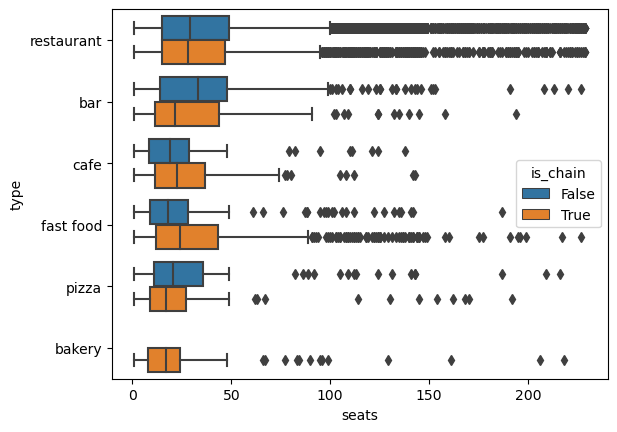

In [107]:
sns.boxplot(x='seats', y='type', hue='is_chain', data=dff)
plt.show()

In [108]:
street_column=dff[['clean_street_check', 'clean_street_tag']]
street_column.head()

,clean_street_check,clean_street_tag
5614,"105,9th",9th
6442,"1087,manzanita",manzanita
8036,"10889,lindbrook",lindbrook
6831,"1147,western",western
9623,"11623,washington",washington


<a id="top_ten"></a>

In [109]:
res_street=dff.groupby('clean_street_tag', as_index=False).agg({'id': ['count'], 'seats': ['mean']}).round()
res_street.columns=['street','number_of_venues','mean_number_of_seats']
top_10=res_street.sort_values(by='number_of_venues', ascending=False).head(10)
display(top_10.head(10))

fig = px.bar(top_10, x='street', y='number_of_venues', title='Top Ten Streets By Number Of Restarants')
fig.show()

,street,number_of_venues,mean_number_of_seats
420,sunset,386,48.0
470,wilshire,379,53.0
360,pico,351,41.0
460,western,343,42.0
177,figueroa,302,42.0
342,olympic,289,50.0
444,vermont,266,45.0
390,santa monica,249,35.0
222,hollywood,246,56.0
25,3rd,242,41.0


<a id="only_one"></a>

In [110]:
only_one_res=res_street.query('number_of_venues == 1')
display('Streets With Only One Restaurant:', len(only_one_res))

'Streets With Only One Restaurant:'

201

'--------------------'

'The Best Streets:'

['sunset',
 'wilshire',
 'pico',
 'western',
 'figueroa',
 'olympic',
 'vermont',
 'santa monica',
 'hollywood',
 '3rd']

'--------------------'

'Restaurants from the top 10 streets'

,id,venue,address,is_chain,type,seats,clean_street_check,clean_street_final,clean_street_tag,word_only,word
5127,16913,bardonna,3206 w sunset blvd,True,bar,1,"3206,sunset","3206 sunset, los angeles,usa",sunset,bardonna,bardonna
5938,17724,lot 1 cafe,1533 w sunset blvd,False,restaurant,1,"1533,sunset","1533 sunset, los angeles,usa",sunset,lot cafe,lot
778,12564,the cafe,3700 wilshire blvd ste 108,False,restaurant,1,"3700,wilshire","3700 wilshire, los angeles,usa",wilshire,the cafe,the
3816,15602,roros chicken,6660 w sunset blvd ste c,False,restaurant,1,"6660,sunset","6660 sunset, los angeles,usa",sunset,roros chicken,roros
4316,16102,bumsan organic milk bar,534 s western ave,True,bar,1,"534,western","534 western, los angeles,usa",western,bumsan organic milk bar,bumsan


'--------------------'

'mean number of seats by street'

,street,mean_number_of_seats
0,3rd,41.132231
1,figueroa,42.215232
2,hollywood,55.626016
3,olympic,49.505190
4,pico,40.586895
5,santa monica,34.638554
6,sunset,48.051813
7,vermont,45.270677
8,western,41.655977
9,wilshire,52.691293


'Boxplots for distribution of seats amount by streets from the top 10:'

'--------------------'

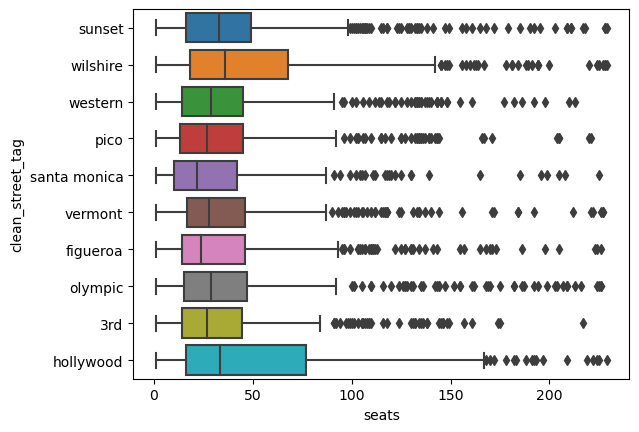

In [111]:
streets=top_10['street'].tolist()
display('-'*20)
display('The Best Streets:', streets)
display('-'*20)

restaurant_in_top_10=dff.query('clean_street_tag == @streets').sort_values(by='seats', ascending=True)

display()
display("Restaurants from the top 10 streets")
display(restaurant_in_top_10.head())
display('-'*20)
display()
ax = sns.boxplot(x = 'seats', y = 'clean_street_tag', data=restaurant_in_top_10)
display()
res_seat=restaurant_in_top_10.groupby('clean_street_tag', as_index=False).agg({'seats': 'mean'})
res_seat.columns=['street','mean_number_of_seats']
display()
display('mean number of seats by street')
display(res_seat)
display('Boxplots for distribution of seats amount by streets from the top 10:')
display('-'*20)

<a id="distribution_on_busy_streets"></a>

In [112]:
top_10
fig = px.bar(top_10, x = 'street', y='mean_number_of_seats', title='Top Ten Streets By Number of seats mean')
fig.show()

,street,number_of_venues,mean_number_of_seats
420,sunset,386,48.0
470,wilshire,379,53.0
360,pico,351,41.0
460,western,343,42.0
177,figueroa,302,42.0
342,olympic,289,50.0
444,vermont,266,45.0
390,santa monica,249,35.0
222,hollywood,246,56.0
25,3rd,242,41.0


<a id="Final_conclusions"></a>

# Final conclusions

__Proportions of types:__

About 75% of the different kinds of establishments in our database are restaurants, whereas only 5% are cafes.

__proportions of chain and nonchain:__

About 63% of the entities are independent.

__typical chain:__

According to the data, an establishment has a 100% chance of being a bakery.
The bakeries in the sample are all part of a chain.
This type of ownership model is likely profitable for the owner and discourages entrepreneurs from operating independent bakeries.

Bars are the least likely of the establishment types to adopt the model of belonging to a chain.

Only 26.5% of bars in Los Angeles are part of a chain.
The reasons for this distinct difference between bakeries and bars may be related to differences between the two establishments, such as differences in the characteristics of the goods , differences in the nature of the place, the hours of operation, the type of clients it attracts, and more. Alternatively, it is possible  that for most of the bars it is simply not worth being part of a chain.

Coffee shops are 60% likely to be part of a chain.
This means that the majority of coffee shops in Los Angeles are owned by a chain.
This discovery should be considered if we intend to enter an existing market. In other words, the owners of Los Angeles cafes may know something we don't - perhaps belonging to a chain pays off financially and reduces operating costs.

According to the data, 17% of the businesses identified as belonging to a chain have only one location.
In the absence of additional information characterizing how chain membership was determined, it is impossible to define the concept of a 'chain' in this project.

__characterizes of chains:__
We already know that the majority of our observations are not chains. However, the stacked bar plot of chain/non-chain by seatsh showed that there are more restaurants with fewer seats if the restaurant is a chain than there are restaurants with fewer seats that are not chains.

However, the difference disappears as the number of seats increases, implying that in large restaurants, there are slightly more chains than non-chains, but the difference is much smaller than in smaller venues.

__Seats distribution:__

The seating distribution is different from the norm and skewed to the right, mainly due to high values contributed by the restaurants category.

The average number of seats is 43.26, which is higher than the median of 27.
The standard deviation is relatively high, at 47.20.

The average number of seats per establishment ranges from 21.31 for bakeries at the bottom to 47.47 for restaurants.
A cafe's average seating capacity is 25.09.

__Crowded streets:__

With 386 restaurants, Sunset Street is the busiest.

With 379 restaurants, Wilshire Boulevard is the second busiest street in Los Angeles.

Pico Street ranks third with 351 restaurants.

3rd Street, with 242 restaurants, rounds out the top ten list.

__The most deserted streets:__

The number of streets where there is only one restaurant is 201.

__Distribution of seats on crowded streets:__

An examination of the busy streets in terms of seating distribution reveals that:

Hollywood Street has the highest average number of seats while ranking second from the bottom in terms of the number of restaurants.
This difference, I believe, is due to the prestige associated with this street, which affects the prices of the dishes and adds to the operating costs.

Wilshire and Sunset streets are among the top five in terms of both the number of restaurants and the number of seats.

Santa Monica Street has the fewest seats, with only 35.

__Overall conclusions:__

1 . A robotic cafe should be part of a chain in order to expand & fit into the Los Angeles restaurant market.

2 . From a strategic perspective, it is advised to check the lesser-known streets as well , because new enterprises are frequently established in less prestigious neighborhoods as well. for example: street 'Sunset', 'Wilshire' & 'Pico'.

3 . We see a growing trend in which more and more businesses are deciding to use robots. This is due to a variety of factors, including difficulty in recruiting employees, simplifying service processes, lowering production costs, prestige, uniqueness, and pioneering, among others.

At the same time, this trend is not reflected in Los Angeles. As of this writing, there isn't a single cafe in Los Angeles that offers full-service catering via robots.

Simultaneously, we must ask ourselves a critical question: How is it possible that the second largest city in the United States does not have a full-service robotic coffee shop in 2022? More research is needed to investigate the factors responsible for this deficiency, as well as whether the customer's desire to eat dinner/his morning in a more special way than simply sitting in front of the TV is related to this.

In 2020, a focus group of diners led by Ball State University property management professor Dina Marie Zemke met to discuss the use of robotic technology in restaurants.
The vast majority of those polled believe that the robotic transformation in catering services is unstoppable, but they are concerned about the social impact of robots in restaurants.

In a 2011 study, Harvard Business School professors Ryan Buell and Michael Norton discovered that customers prefer to watch a sandwich being made rather than receiving a finished product.

__To summarize,__

__I recommend conducting additional and in-depth market research, in which we will examine in greater detail cafes in Los Angeles, but only after we have developed a clear business model, the guidelines for which will be:__

1. What is the product that we intend to offer? 2. In what manner
3. How does our product/service renew/refresh the local market?
4. What are the operational costs of establishing a robotic cafe?
5. Customer focus group in Los Angeles
6. Focus group with Los Angeles business owners.

<a id="presentation"></a>

presentation: https://www.canva.com/design/DAFORva-wFs/RTeBhd9uQToxUsaESPr8Bw/view?utm_content=DAFORva-wFs&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton